# 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
!pip install koreanize_matplotlib
import matplotlib.pyplot as plt
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 41.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_beta = pd.read_csv( '/content/drive/MyDrive/DSL/EDA/25-1/data/더미X산업별data/산업별_베타_nonshift_final.csv', index_col = 0)
df_beta.index = df_beta.index.str.replace("df_코스피_", "")
df_beta.head(3)

,자기자본비율,차입금의존도,매출액증가율,영업이익률,총자본회전율,부채상환능력,log_당좌비율,ROA당기순이익
업종,,,,,,,,
IT_서비스,-2.457572,0.597144,-1.171806,0.023690,30.309383,1.225219,-0.113932,-0.036170
건설,-0.997468,0.687718,-0.022793,0.567957,-5.375150,0.104924,0.005802,0.061801
금속,-0.707515,-1.240226,0.923701,0.707894,13.614675,3.890025,0.044016,0.598179


# **클러스터링 진행**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score


beta값 스케일링

In [ ]:
#스케일링

import pandas as pd
from sklearn.preprocessing import RobustScaler

# robustScaler 객체 생성
scaler = RobustScaler()

# fit & transform 진행하여 표준화된 데이터를 numpy 배열로 반환
beta_scaled_array = scaler.fit_transform(df_beta)

# numpy 배열을 DataFrame으로 변환 (원래의 인덱스와 컬럼명을 유지)
df_beta_scaled = pd.DataFrame(beta_scaled_array, index=df_beta.index, columns=df_beta.columns)

# 결과 확인
print(df_beta_scaled.head())


          자기자본비율    차입금의존도    매출액증가율     영업이익률    총자본회전율    부채상환능력  log_당좌비율  \
업종                                                                             
IT_서비스 -0.347381 -0.022014 -1.011320 -0.673756  1.351377  0.265121 -0.980421   
건설      0.199163  0.003823 -0.408447 -0.033771 -0.769466 -0.285760 -0.023875   
금속      0.307698 -0.546152  0.088166  0.130776  0.359158  1.575482  0.281417   
금융      0.809334 -0.659287  0.103386 -2.330154  0.040162  0.006133  2.727287   
기계_장비  -1.808590  0.946484 -0.360218 -0.385162  0.783238 -0.493371 -1.000942   

        ROA당기순이익  
업종                
IT_서비스 -0.693053  
건설     -0.487227  
금속      0.639641  
금융     -0.090203  
기계_장비   0.090203  


In [ ]:
df_beta_scaled.describe()

,자기자본비율,차입금의존도,매출액증가율,영업이익률,총자본회전율,부채상환능력,log_당좌비율,ROA당기순이익
count,1.800000e+01,18.000000,1.800000e+01,18.000000,18.000000,1.800000e+01,1.800000e+01,18.000000
mean,-7.054019e-02,0.154953,-7.932218e-02,-0.011961,-0.178417,1.931430e-01,-1.130990e-01,-0.060781
std,1.083820e+00,1.052003,7.568223e-01,1.078915,0.792373,1.009474e+00,1.201943e+00,1.425034
min,-1.812441e+00,-1.616000,-1.332363e+00,-2.330154,-1.588742,-1.630840e+00,-3.066906e+00,-2.754241
25%,-5.253077e-01,-0.497023,-6.772052e-01,-0.601608,-0.773668,-4.152901e-01,-5.753692e-01,-0.647816
50%,-2.775558e-17,0.000000,2.775558e-17,0.000000,0.000000,-2.775558e-17,-3.469447e-18,0.000000
75%,4.746923e-01,0.502977,3.227948e-01,0.398392,0.226332,5.847099e-01,4.246308e-01,0.352184
max,2.652665e+00,3.132341,1.354150e+00,3.089891,1.351377,2.880337e+00,2.727287e+00,3.301633


In [ ]:
df_beta_scaled

,자기자본비율,차입금의존도,매출액증가율,영업이익률,총자본회전율,부채상환능력,log_당좌비율,ROA당기순이익
업종,,,,,,,,
IT_서비스,-0.347381,-0.022014,-1.011320,-0.673756,1.351377,0.265121,-0.980421,-0.693053
건설,0.199163,0.003823,-0.408447,-0.033771,-0.769466,-0.285760,-0.023875,-0.487227
금속,0.307698,-0.546152,0.088166,0.130776,0.359158,1.575482,0.281417,0.639641
금융,0.809334,-0.659287,0.103386,-2.330154,0.040162,0.006133,2.727287,-0.090203
기계_장비,-1.808590,0.946484,-0.360218,-0.385162,0.783238,-0.493371,-1.000942,0.090203
비금속,-0.584617,0.840462,1.258901,3.089891,-0.067237,1.156543,-0.276026,2.486471
섬유_의류,2.652665,-1.616000,0.631089,1.019803,-1.424850,2.880337,0.839731,3.301633
오락_문화,-0.670145,0.581788,-1.332363,0.162168,0.669050,0.893058,0.413445,-2.754241
운송_창고,-0.199163,-0.287385,-0.823440,0.477134,-0.040162,0.649823,0.428360,0.751785


In [ ]:
df_beta_scaled.to_csv('/content/drive/MyDrive/DSL/EDA/25-1/data/더미X산업별data/df_beta_scaled.csv')

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



X_train = df_beta_scaled.iloc[:,1:]

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                         for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor   Feature
0    5.506211    차입금의존도
1    2.021920    매출액증가율
2    2.828843     영업이익률
3    1.281308    총자본회전율
4    2.736645    부채상환능력
5    3.765910  log_당좌비율
6    4.210141  ROA당기순이익


-> 차원축소 없이 진행. 축소할 경우 p값을 해석에 반영 어려워짐.

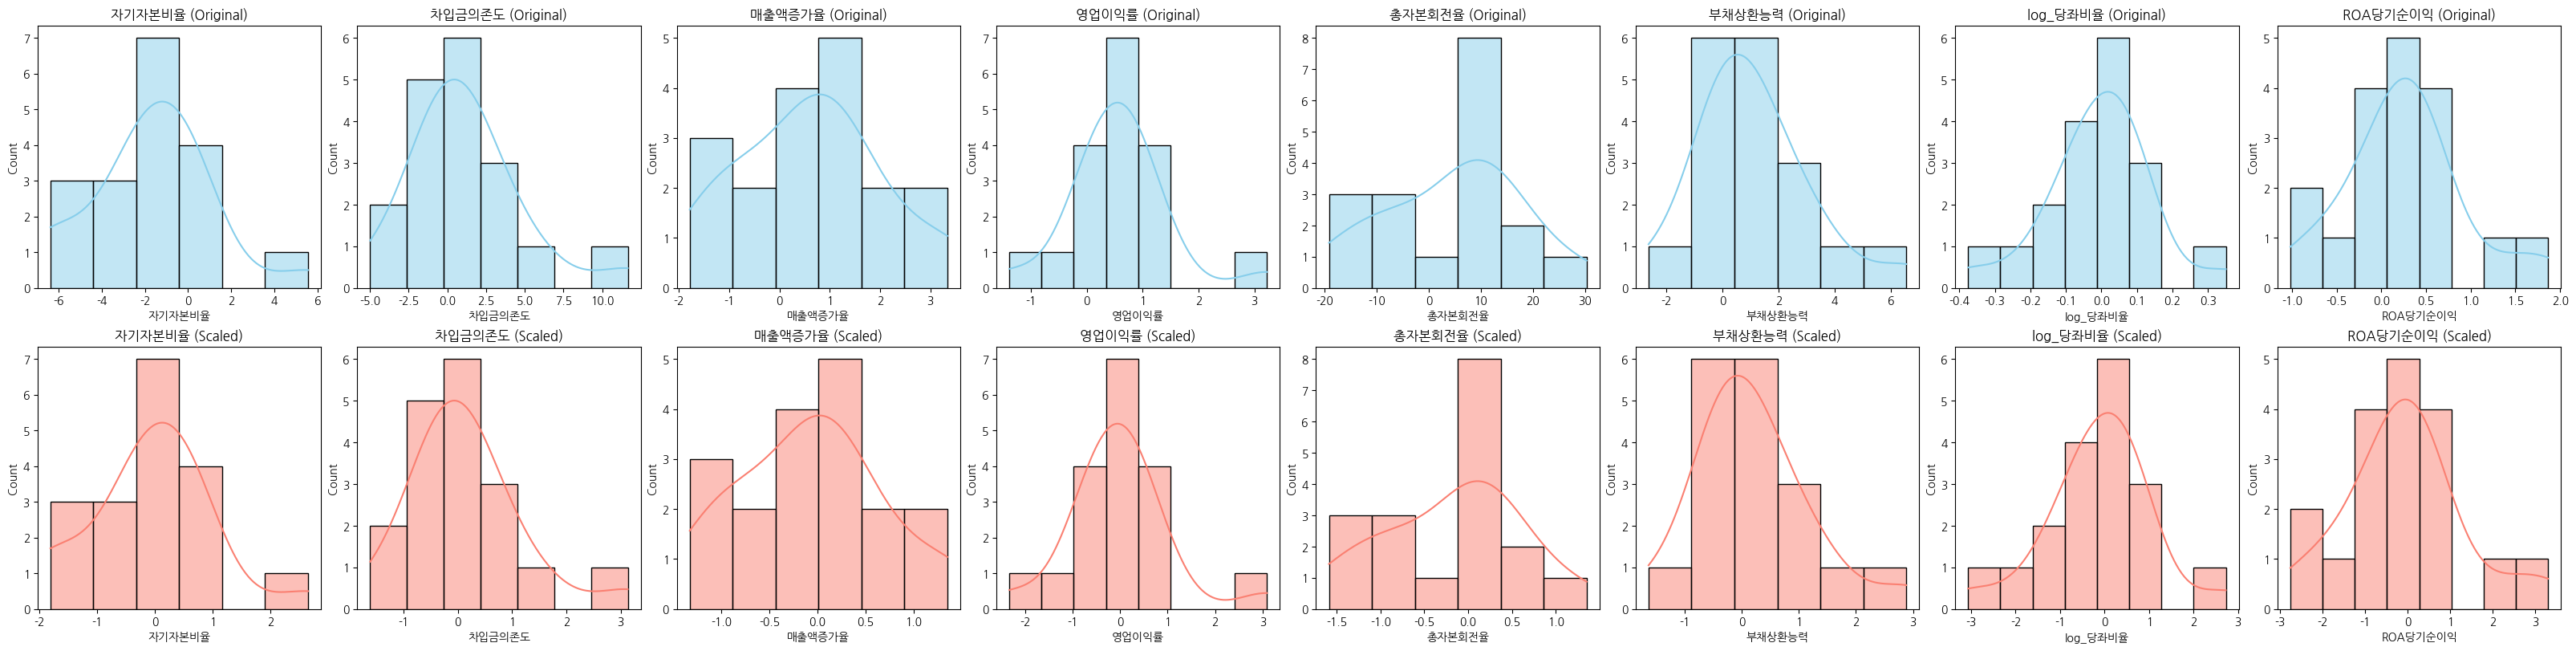

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 2. 각 변수별 분포를 전/후로 비교하는 시각화 코드
# 변수 개수
cols = df_beta.columns
n_cols = len(cols)

# Figure와 subplot 생성 (2행: 1행은 원본, 2행은 표준화 후)
fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(4*n_cols, 8), constrained_layout=True)

for i, col in enumerate(cols):
    # 원본 데이터 분포 (상단)
    sns.histplot(df_beta[col], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'{col} (Original)')

    # 표준화된 데이터 분포 (하단)
    sns.histplot(df_beta_scaled[col], kde=True, ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'{col} (Scaled)')

# 전체 플롯 출력
plt.show()


## 계층적 군집화

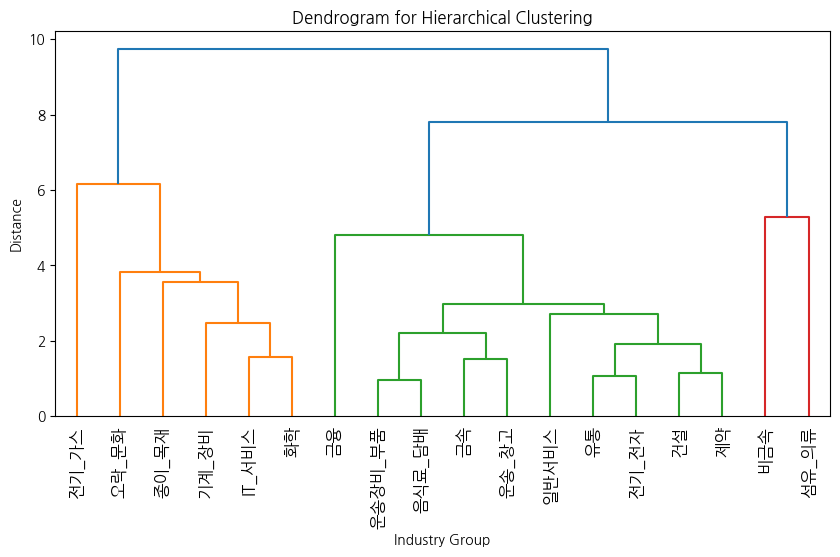

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 2️⃣ 계층적 클러스터링 수행 (Ward 방법)
linkage_matrix = linkage(df_beta_scaled, method='ward')

# 3️⃣ 덴드로그램 시각화
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, leaf_rotation=90, labels=df_beta_scaled.index)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Industry Group")
plt.ylabel("Distance")
plt.show()

In [ ]:
data_prime = df_beta_scaled.copy()

In [ ]:
# used complete linkeage
# used euclidean distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters = linkage(y=data_prime, method='complete', metric='euclidean')

In [ ]:
cut_tree = fcluster(clusters, t=5.9, criterion='distance')
cut_tree

array([1, 3, 3, 3, 1, 4, 4, 1, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(data_prime, cut_tree)
print('Silhouette Score:', score_samples[:5], '\nSilhouette Score shape:', score_samples.shape, '\n')

average_score = silhouette_score(data_prime, cut_tree)
# np.mean(score_samples) == average_score: True
# 전체 클러스터의 평균 silhouette_score 값
print('Silhouette Average Score:{0:.3f}'.format(average_score))

Silhouette Score: [0.14910939 0.34381474 0.37722772 0.25368622 0.19294893] 
Silhouette Score shape: (18,) 

Silhouette Average Score:0.234


In [ ]:
# 클러스터 개수 확인
num_clusters = len(np.unique(cut_tree))
print(f"🔍 현재 클러스터 개수: {num_clusters}")

🔍 현재 클러스터 개수: 4


In [ ]:
data_prime['hc_cluster'] = cut_tree
data_prime['silhouette_coeff'] = score_samples
data_prime

,자기자본비율,차입금의존도,매출액증가율,영업이익률,총자본회전율,부채상환능력,log_당좌비율,ROA당기순이익,hc_cluster,silhouette_coeff
업종,,,,,,,,,,
IT_서비스,-0.347381,-0.022014,-1.011320,-0.673756,1.351377,0.265121,-0.980421,-0.693053,1,0.149109
건설,0.199163,0.003823,-0.408447,-0.033771,-0.769466,-0.285760,-0.023875,-0.487227,3,0.343815
금속,0.307698,-0.546152,0.088166,0.130776,0.359158,1.575482,0.281417,0.639641,3,0.377228
금융,0.809334,-0.659287,0.103386,-2.330154,0.040162,0.006133,2.727287,-0.090203,3,0.253686
기계_장비,-1.808590,0.946484,-0.360218,-0.385162,0.783238,-0.493371,-1.000942,0.090203,1,0.192949
비금속,-0.584617,0.840462,1.258901,3.089891,-0.067237,1.156543,-0.276026,2.486471,4,-0.072264
섬유_의류,2.652665,-1.616000,0.631089,1.019803,-1.424850,2.880337,0.839731,3.301633,4,0.042831
오락_문화,-0.670145,0.581788,-1.332363,0.162168,0.669050,0.893058,0.413445,-2.754241,1,0.146171
운송_창고,-0.199163,-0.287385,-0.823440,0.477134,-0.040162,0.649823,0.428360,0.751785,3,0.382576


In [ ]:
data_prime.to_csv('/content/drive/MyDrive/DSL/EDA/25-1/data/더미X산업별data/clustered_final.csv')

In [ ]:

clusters = data_prime.reset_index().groupby('hc_cluster')['업종'].apply(list)

# 클러스터별 산업 리스트 출력
for cluster, industries in clusters.items():
    print(f"📌 클러스터 {cluster}:")
    print(industries)
    print("-" * 50)

📌 클러스터 1:
['IT_서비스', '기계_장비', '오락_문화', '종이_목재', '화학']
--------------------------------------------------
📌 클러스터 2:
['전기_가스']
--------------------------------------------------
📌 클러스터 3:
['건설', '금속', '금융', '운송_창고', '운송장비_부품', '유통', '음식료_담배', '일반서비스', '전기_전자', '제약']
--------------------------------------------------
📌 클러스터 4:
['비금속', '섬유_의류']
--------------------------------------------------


In [ ]:
cluster_g = data_prime.groupby('hc_cluster')

In [ ]:
df_beta_scaled.columns

Index(['자기자본비율', '차입금의존도', '매출액증가율', '영업이익률', '총자본회전율', '부채상환능력', 'log_당좌비율',
       'ROA당기순이익'],
      dtype='object')

### 코사인거리로 변경

In [ ]:
data_prime = df_beta_scaled.copy()

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_samples, silhouette_score

# 1️⃣ 코사인 거리 기반 계층적 클러스터링 수행
clusters = linkage(pdist(data_prime.values, metric="cosine"), method="average")

# 2️⃣ 클러스터 개수를 조정 (t 값은 실험적으로 조정 가능)
cut_tree = fcluster(clusters, t=0.7, criterion='distance')

# 3️⃣ 개별 데이터 포인트의 실루엣 점수 계산
score_samples = silhouette_samples(data_prime, cut_tree, metric="cosine")

# 4️⃣ 전체 클러스터의 평균 실루엣 점수 계산
average_score = silhouette_score(data_prime, cut_tree, metric="cosine")

# 5️⃣ 결과 출력
print('Silhouette Sample Scores:', score_samples[:5])  # 개별 샘플 실루엣 점수 일부 출력
print('Silhouette Score shape:', score_samples.shape)  # 실루엣 점수 배열 크기 확인
print('Silhouette Average Score: {:.3f}'.format(average_score))  # 전체 평균 실루엣 점수 출력

Silhouette Sample Scores: [0.51005455 0.52985117 0.52230501 0.66820254 0.63473197]
Silhouette Score shape: (18,)
Silhouette Average Score: 0.450


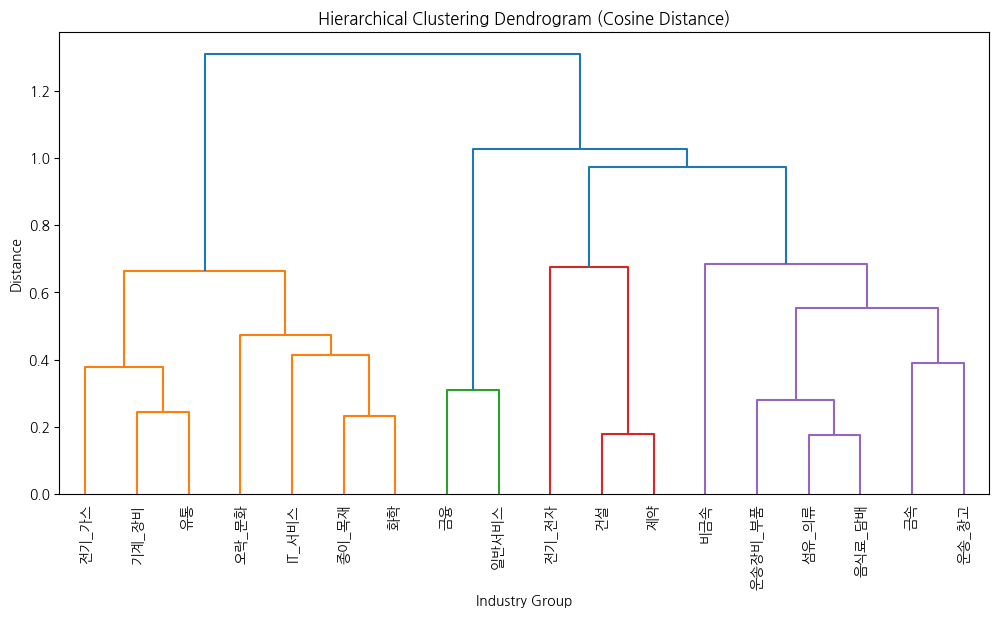

In [ ]:
# 🔹 2️⃣ 덴드로그램 시각화
plt.figure(figsize=(12, 6))
dendrogram(
    clusters,
    labels=data_prime.index,  # 산업명을 라벨로 표시
    leaf_rotation=90,  # 라벨 가독성을 위해 90도 회전
    leaf_font_size=10,  # 글자 크기 설정
    color_threshold=0.7  # 클러스터링 분기 색상 구분 기준값
)
plt.title("Hierarchical Clustering Dendrogram (Cosine Distance)")
plt.xlabel("Industry Group")
plt.ylabel("Distance")
plt.show()

In [ ]:
data_prime_cos = data_prime.copy()
data_prime_cos['hc_cluster'] = cut_tree
data_prime_cos['silhouette_coeff'] = score_samples
data_prime_cos

,자기자본비율,차입금의존도,매출액증가율,영업이익률,총자본회전율,부채상환능력,log_당좌비율,ROA당기순이익,hc_cluster,silhouette_coeff
업종,,,,,,,,,,
IT_서비스,-0.347381,-0.022014,-1.011320,-0.673756,1.351377,0.265121,-0.980421,-0.693053,1,0.510055
건설,0.199163,0.003823,-0.408447,-0.033771,-0.769466,-0.285760,-0.023875,-0.487227,3,0.529851
금속,0.307698,-0.546152,0.088166,0.130776,0.359158,1.575482,0.281417,0.639641,4,0.522305
금융,0.809334,-0.659287,0.103386,-2.330154,0.040162,0.006133,2.727287,-0.090203,2,0.668203
기계_장비,-1.808590,0.946484,-0.360218,-0.385162,0.783238,-0.493371,-1.000942,0.090203,1,0.634732
비금속,-0.584617,0.840462,1.258901,3.089891,-0.067237,1.156543,-0.276026,2.486471,4,0.440959
섬유_의류,2.652665,-1.616000,0.631089,1.019803,-1.424850,2.880337,0.839731,3.301633,4,0.623841
오락_문화,-0.670145,0.581788,-1.332363,0.162168,0.669050,0.893058,0.413445,-2.754241,1,0.318547
운송_창고,-0.199163,-0.287385,-0.823440,0.477134,-0.040162,0.649823,0.428360,0.751785,4,0.453306


비금속 운송창고 / 오락 음식료 전기가스 (삭제) / 운송장비 전기전자 금융 (삭제)

In [ ]:
data_prime_cos.to_csv('/content/drive/MyDrive/DSL/EDA/25-1/data/더미X산업별data/clustered_cos.csv')

## GMM

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
X_1 = df_beta_scaled.reset_index(drop=True).values

In [ ]:
# 클러스터 개수 최적화 (2~6개 시도)
bic_scores = []
n_clusters = range(2, 8)

for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_1)   #
    bic_scores.append(gmm.bic(X_1))

# BIC 최소값을 가지는 클러스터 개수 선택
optimal_n = n_clusters[np.argmin(bic_scores)]
print(f"최적 클러스터 개수: {optimal_n}")

최적 클러스터 개수: 4


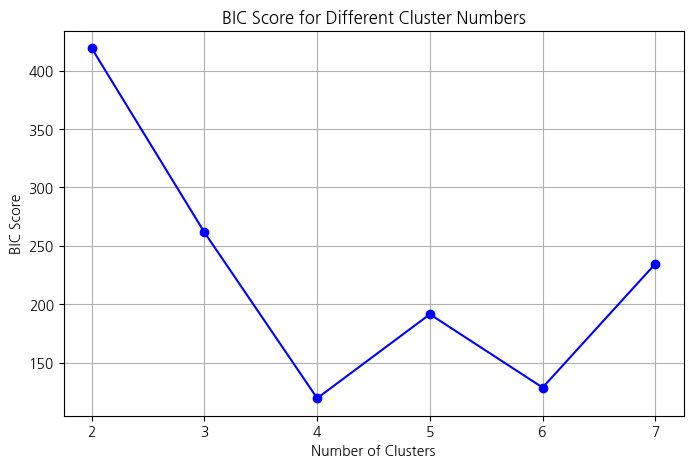

In [ ]:
# BIC 스코어 시각화
plt.figure(figsize=(8, 5))
plt.plot(n_clusters, bic_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC Score for Different Cluster Numbers')
plt.grid(True)
plt.show()

In [ ]:
# 최적 클러스터 개수 4개일 때의 BIC 값 확인
optimal_gmm = GaussianMixture(n_components = 4, random_state=42)
optimal_gmm.fit(X_1)
optimal_bic = optimal_gmm.bic(X_1)

print(f"BIC Score (n=4): {optimal_bic}")

BIC Score (n=4): 119.38944004516122


너무 높음. 기각

# 시각화


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis

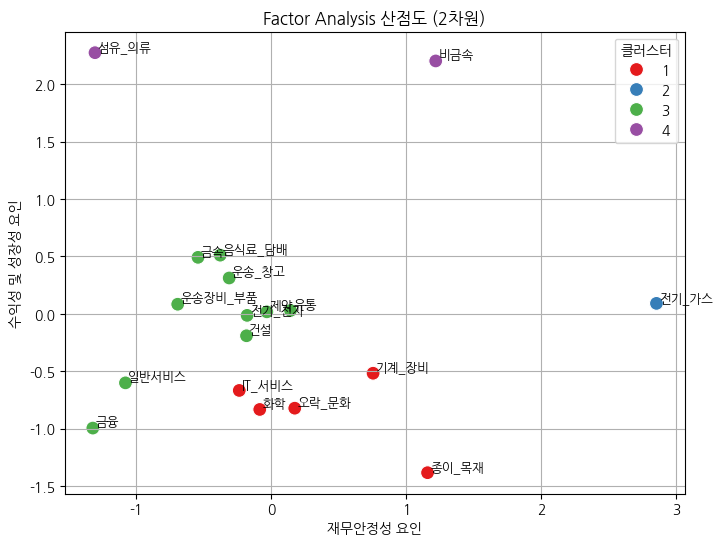

In [ ]:
# beta_robust_scaled: RobustScaler로 스케일링한 베타값 DataFrame, 'cluster' 컬럼이 존재한다고 가정
# 예시 데이터 준비 (실제 데이터에 맞게 수정하세요)
# beta_robust_scaled = pd.read_csv("beta_robust_scaled.csv", index_col=0)

# 'cluster' 컬럼을 제외한 데이터로 FA 수행
fa = FactorAnalysis(n_components=2, random_state=42, rotation='varimax')
fa_result = fa.fit_transform(df_beta_scaled)

# 결과 DataFrame 생성: 각 축에 "Factor 1", "Factor 2"라는 이름 부여
fa_df = pd.DataFrame(fa_result, columns=['Factor 1', 'Factor 2'], index=df_see.index)
fa_df['cluster'] = df_see['hc_cluster']

# 산점도 시각화: 클러스터별로 색상 구분하고, 각 업종 이름을 텍스트로 표시
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Factor 1', y='Factor 2', hue='cluster', data=fa_df, palette='Set1', s=100)

# 각 점에 업종 이름을 텍스트로 추가
for industry in fa_df.index:
    plt.text(fa_df.loc[industry, 'Factor 1'] + 0.02,
             fa_df.loc[industry, 'Factor 2'] + 0.02,
             industry, fontsize=9)

plt.title("Factor Analysis 산점도 (2차원)")
plt.xlabel("재무안정성 요인")
plt.ylabel("수익성 및 성장성 요인")
plt.legend(title='클러스터')
plt.grid(True)
plt.show()

클러스터	주요 산업	특징

클러스터 1 (빨간색)	기계_장비, 종이_목재, IT_서비스, 화학, 오락_문화	부채 의존도가 높고 수익성이 낮아 리스크가 있음

클러스터 2 (파란색)	전기_가스	재무구조가 튼튼하지만 성장성이 크지 않음

클러스터 3 (초록색)	금융, 일반서비스, 운송·장비·부품, 건설, 유통, 음식료·담배 등	중간 정도의 부채 의존도를 가지며 수익성이 높아 성장이 기대됨

클러스터 4 (보라색)	섬유_의류, 비금속	수익성과 성장성이 가장 높지만 재무구조는 중립적

Factor Loadings DataFrame:
          Factor 1  Factor 2
자기자본비율   -0.837932  0.469382
차입금의존도    0.974481 -0.237455
매출액증가율    0.215400  0.363024
영업이익률     0.365092  0.831288
총자본회전율   -0.079061 -0.345249
부채상환능력   -0.378259  0.707553
log_당좌비율 -0.994225  0.104830
ROA당기순이익 -0.456342  1.135135


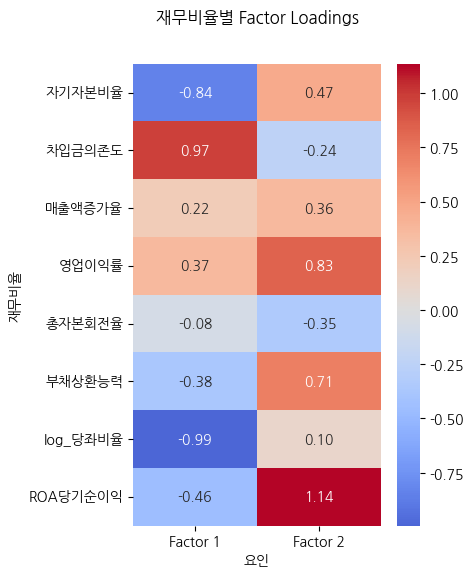

In [ ]:
loadings = fa.components_.T

# Factor 이름 지정 (예: Factor 1, Factor 2)
factor_names = [f"Factor {i+1}" for i in range(loadings.shape[1])]

# 로딩값 DataFrame 생성: index는 재무비율 이름, columns는 Factor 이름
loadings_df = pd.DataFrame(loadings, index=df_beta_scaled.columns, columns=factor_names)

# 로딩값 DataFrame 출력
print("Factor Loadings DataFrame:")
print(loadings_df)

# --- 히트맵 시각화 ---

plt.figure(figsize=(4, 6))
sns.heatmap(loadings_df, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("재무비율별 Factor Loadings", pad=30)
plt.xlabel("요인")
plt.ylabel("재무비율")
plt.show()

1: 차입금의존도 / 2: ROA, 영업이익률,

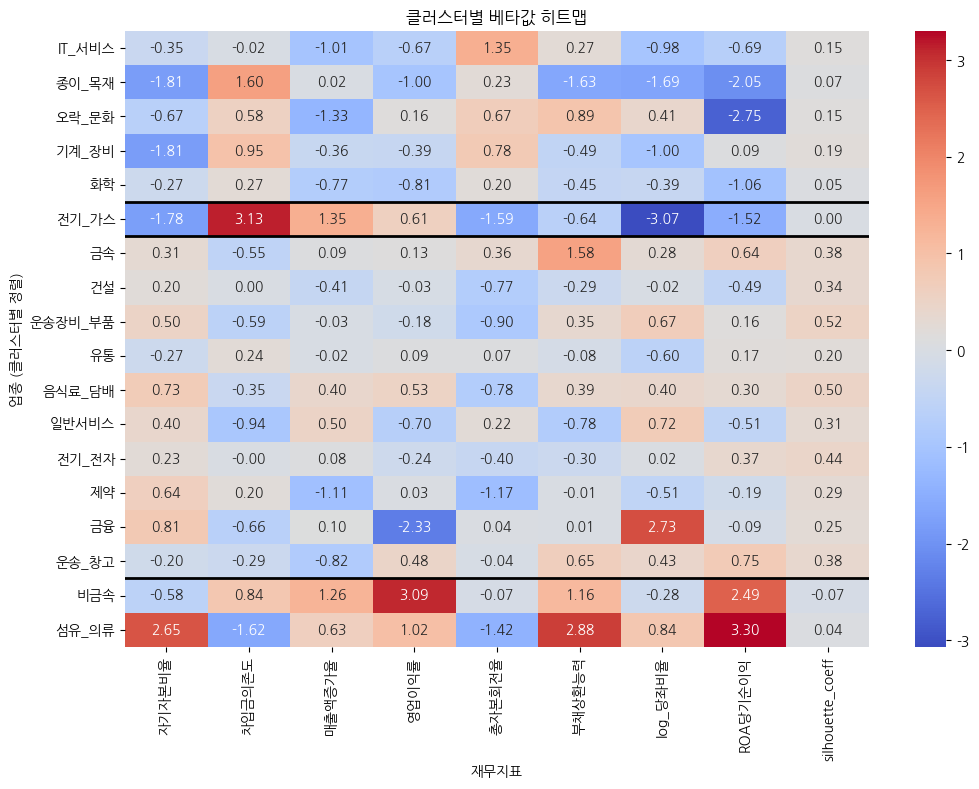

In [ ]:
# beta_robust_scaled: RobustScaler를 적용한 베타값 DataFrame (업종×재무지표)
# cluster_assignments: 각 업종에 할당된 클러스터 번호 (예: Series 혹은 DataFrame의 'cluster' 컬럼)
# 예를 들어:
# beta_robust_scaled['cluster'] = cluster_assignments

# 클러스터별로 정렬 (cluster 컬럼 기준)
df_pca = df_see.copy()  # 클러스터 번호가 담긴 컬럼 추가
df_pca= df_pca.sort_values('hc_cluster')

# 히트맵 그리기 (cluster 컬럼은 제외)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(df_pca.drop('hc_cluster', axis=1), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("클러스터별 베타값 히트맵")
plt.xlabel("재무지표")
plt.ylabel("업종 (클러스터별 정렬)")

# 클러스터 경계선 추가하기
# 정렬된 데이터프레임의 'cluster' 컬럼 값을 numpy array로 변환
cluster_labels = df_pca['hc_cluster'].values

# 클러스터가 변경되는 인덱스를 찾습니다.
boundaries = []
prev = cluster_labels[0]
for idx, cl in enumerate(cluster_labels):
    if cl != prev:
        boundaries.append(idx)  # idx가 클러스터 변경 시작 인덱스
        prev = cl

# 히트맵에 수평선 추가 (axhline는 y 좌표에 선을 그림)
for b in boundaries:
    ax.axhline(b, color='black', lw=2)

plt.show()

In [ ]:
p_df = pd.read_csv('/content/drive/MyDrive/DSL/EDA/25-1/data/더미X산업별data/산업별_p값_nonshift_final.csv')

In [ ]:
p_df.set_index('업종', inplace=True)
p_df.index = p_df.index.str.replace("df_코스피_", "")

,자기자본비율,차입금의존도,매출액증가율,영업이익률,총자본회전율,부채상환능력,log_당좌비율,ROA당기순이익
업종,,,,,,,,
IT_서비스,0.051232,0.732692,0.582348,0.973863,0.058864,0.607057,0.127110,0.881440
건설,0.665093,0.694555,0.986243,0.209040,0.683197,0.937973,0.929928,0.898634
금속,0.719123,0.313666,0.328234,0.122633,0.173984,0.000900,0.374121,0.091856


In [ ]:
p_df

,자기자본비율,차입금의존도,매출액증가율,영업이익률,총자본회전율,부채상환능력,log_당좌비율,ROA당기순이익
업종,,,,,,,,
IT_서비스,0.051232,0.732692,0.582348,0.973863,0.058864,0.607057,0.127110,8.814397e-01
건설,0.665093,0.694555,0.986243,0.209040,0.683197,0.937973,0.929928,8.986336e-01
금속,0.719123,0.313666,0.328234,0.122633,0.173984,0.000900,0.374121,9.185625e-02
금융,0.866902,0.684015,0.779446,0.205897,0.270696,0.775048,0.154148,5.787090e-01
기계_장비,0.013494,0.023950,0.945303,0.622769,0.062710,0.773907,0.143830,5.047904e-01
비금속,0.212656,0.083047,0.082418,0.000189,0.466328,0.068504,0.761209,4.643399e-07
섬유_의류,0.004605,0.012844,0.178318,0.000563,0.381914,0.000002,0.064328,4.392248e-04
오락_문화,0.269927,0.318963,0.248405,0.692047,0.104151,0.370402,0.291970,2.478131e-01
운송_창고,0.475104,0.904869,0.655657,0.418523,0.782177,0.065622,0.527895,2.032988e-01


In [ ]:
df_see

,자기자본비율,차입금의존도,매출액증가율,영업이익률,총자본회전율,부채상환능력,log_당좌비율,ROA당기순이익,hc_cluster,silhouette_coeff
업종,,,,,,,,,,
IT_서비스,-0.347381,-0.022014,-1.011320,-0.673756,1.351377,0.265121,-0.980421,-0.693053,1,0.149109
건설,0.199163,0.003823,-0.408447,-0.033771,-0.769466,-0.285760,-0.023875,-0.487227,3,0.343815
금속,0.307698,-0.546152,0.088166,0.130776,0.359158,1.575482,0.281417,0.639641,3,0.377228
금융,0.809334,-0.659287,0.103386,-2.330154,0.040162,0.006133,2.727287,-0.090203,3,0.253686
기계_장비,-1.808590,0.946484,-0.360218,-0.385162,0.783238,-0.493371,-1.000942,0.090203,1,0.192949
비금속,-0.584617,0.840462,1.258901,3.089891,-0.067237,1.156543,-0.276026,2.486471,4,-0.072264
섬유_의류,2.652665,-1.616000,0.631089,1.019803,-1.424850,2.880337,0.839731,3.301633,4,0.042831
오락_문화,-0.670145,0.581788,-1.332363,0.162168,0.669050,0.893058,0.413445,-2.754241,1,0.146171
운송_창고,-0.199163,-0.287385,-0.823440,0.477134,-0.040162,0.649823,0.428360,0.751785,3,0.382576


In [ ]:
#레이더 차트

def make_radar_chart(categories, values, title):
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)
    ax.set_title(title)
    ax.set_title(title, pad=30)  # 필요에 따라 pad 값을 조정
    ax.grid(True)
    plt.show()

In [ ]:
df_cl = data_prime.drop(columns='silhouette_coeff')

## 유클리드 거리 ver

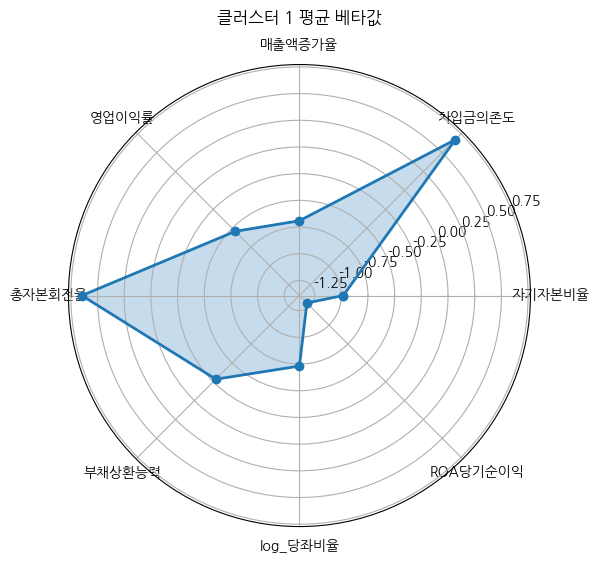

In [ ]:
cluster1_data = df_cl[df_cl['hc_cluster'] == 1].drop('hc_cluster', axis=1).mean()
categories = list(cluster1_data.index)
values = cluster1_data.values
make_radar_chart(categories, values, "클러스터 1 평균 베타값")

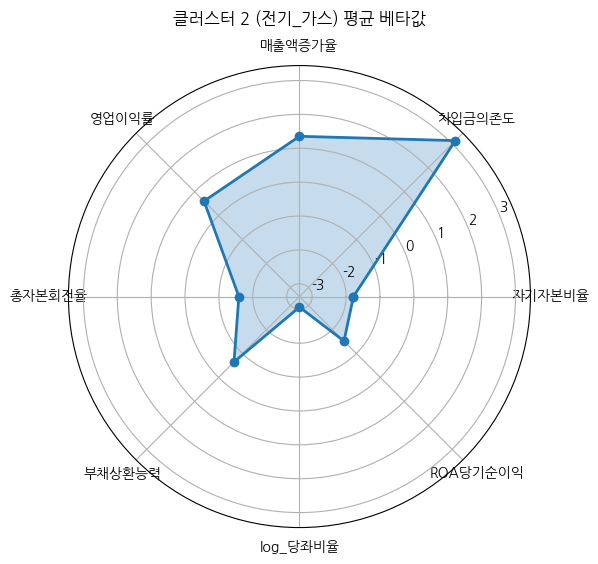

In [ ]:
# 예시: 각 클러스터의 평균 베타값 (여기서는 클러스터 2, 전기_가스만 단독으로 예시)

cluster2_data = df_cl[df_cl['hc_cluster'] == 2].drop('hc_cluster', axis=1).mean()
categories = list(cluster2_data.index)
values = cluster2_data.values
make_radar_chart(categories, values, "클러스터 2 (전기_가스) 평균 베타값")

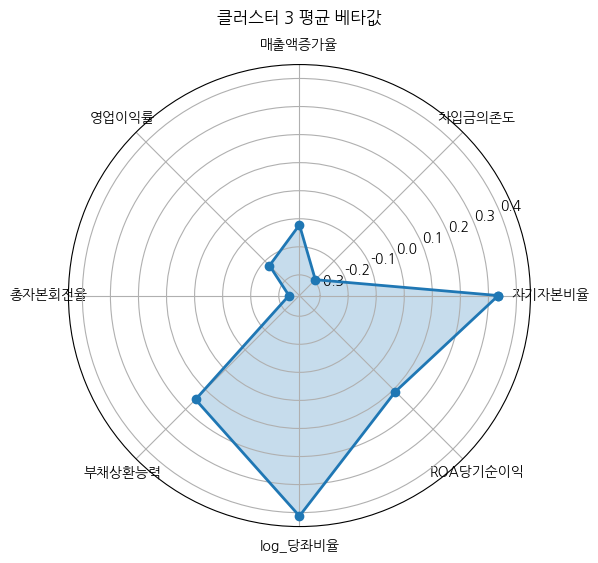

In [ ]:
cluster3_data = df_cl[df_cl['hc_cluster'] == 3].drop('hc_cluster', axis=1).mean()
categories = list(cluster3_data.index)
values = cluster3_data.values
make_radar_chart(categories, values, "클러스터 3 평균 베타값")

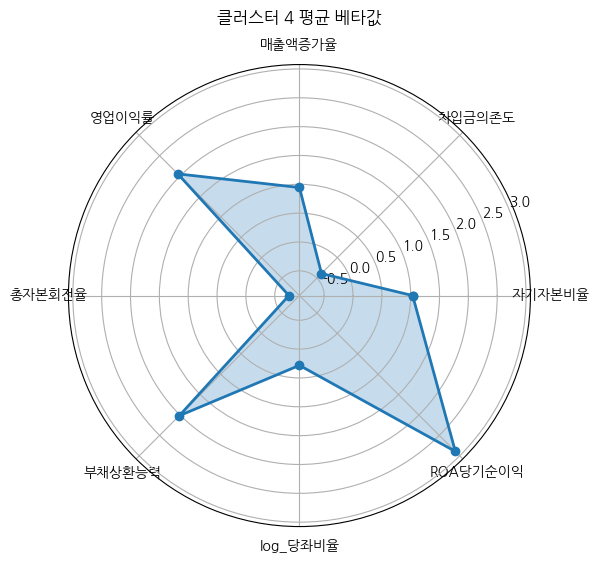

In [ ]:
cluster4_data = df_cl[df_cl['hc_cluster'] == 4].drop('hc_cluster', axis=1).mean()
categories = list(cluster4_data.index)
values = cluster4_data.values
make_radar_chart(categories, values, "클러스터 4 평균 베타값")